<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.1. Import Necessary Libraries

In [122]:
#Installing surprise
#!pip install scikit-surprise 

In [188]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split as tts_sklearn
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split as tts_surprise
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.2. Import the dataset (concrete.csv) and read it into DataFrame:

In [189]:
data = pd.read_csv("ratings_Electronics.csv")
data.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


### Since, we don't see any header row, we have to add it manually.

In [190]:
data = pd.read_csv("ratings_Electronics.csv",
                 header=None,
                 names=["userId","productId","Rating","timestamp"])



In [191]:
data.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


### Since, we are not going to use timestamp attribute of the dataset, we can drop it.

In [192]:
data.drop("timestamp",axis=1,inplace=True)

data.head()

,userId,productId,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


# Performing Basic EDA

Find the shape of the data,data type of individual columns

Check the presence of missing values

Descriptive stats of numerical columns

Find the distribution of numerical columns and the asssociated skeweness and presence of outliers

Distribution of categorical columns


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.3 Shape of data :

In [193]:
data.shape

(7824482, 3)

<h3><b>We see that there are 7824482 rows and 3 columns in data.</b><h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.4 Summarised Information about the data and the datatypes of each respective attributes.

In [194]:
data.info() #Shows datatypes of each attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
Rating       float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


<h3><b> 
userId column is of object datatype, also we see that it has alphanumeric characters.
productId column is of object datatype. 
Rating column is float datatype which seems correct.
    
</b></h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.5 Check the dataset for any missing values, or duplicate values :


In [195]:
data.isna().sum()

userId       0
productId    0
Rating       0
dtype: int64

In [196]:
data.isnull().sum()

userId       0
productId    0
Rating       0
dtype: int64

In [197]:
# Check for duplicate rows
data[data.duplicated(keep = 'first')]

,userId,productId,Rating


<h3><b>We see that there are no missing or null values or duplicate values in data.</b> </h3>

<h3><b> Now, we will see Summarised Data : </b> </h3>

In [198]:
data.describe().T #Shows brief summary of data

,count,mean,std,min,25%,50%,75%,max
Rating,7824482.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


<h3><b>We see mean rating as 4.01. Now that we have seen various statistics and measures of the various attributes, and got a fair idea about the data, lets see the distribution of data through visualization. </b></h3>

In [199]:
#Let's see number of unique products

len(data["productId"].unique())

476002

### There are 476002 unique products. 

In [200]:
#Let's see number of unique users

len(data["userId"].unique())

4201696

### There are 4201696 unique users but 7824482 rows in ratings, which means that users have rated multiple products as well.

In [201]:
# Let's analyse ratings as well.

data["Rating"].unique()

array([5., 1., 3., 2., 4.])

In [202]:
# We see that there are only 5 unique ratings, and their datatype is float, so we will simply concert them to int.

data["Rating"] = data["Rating"].astype("int")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userId       object
productId    object
Rating       int64
dtypes: int64(1), object(2)
memory usage: 179.1+ MB


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.5 Univarite Analysis :

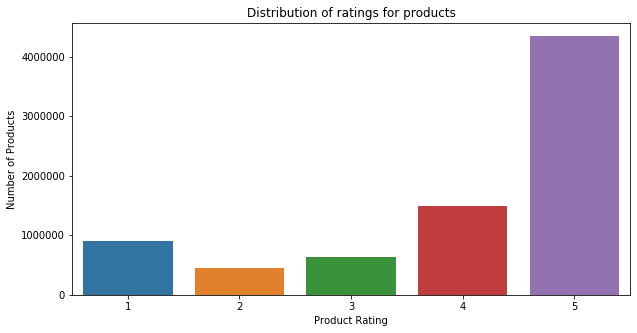

In [203]:
plt.figure(figsize=(10,5))
sns.countplot(data["Rating"])
plt.xlabel("Product Rating")
plt.ylabel("Number of Products")
plt.title("Distribution of ratings for products")
plt.show()

### We clearly see that large number of products have got a rating of 5, and very few products have got a rating from 1 to 3. This shows a skewness in the data. Let's try to understand how many ratings products have got.

In [204]:
data["productId"].value_counts()

B0074BW614    18244
B00DR0PDNE    16454
B007WTAJTO    14172
B0019EHU8G    12285
B006GWO5WK    12226
              ...  
B004TGPBVE        1
B00C04SJ1G        1
B0057UYLK8        1
B009RR0TEE        1
B005JAN4ZY        1
Name: productId, Length: 476002, dtype: int64

### We see that some prodcuts have recieved large number of ratings, more than 10000 but some products have just received 1 ratings. This shows skewness and also the need to take subset of data to make it denser/sparser.

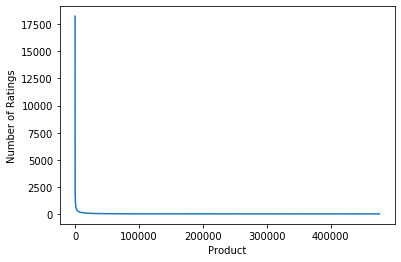

In [205]:
plt.plot(data["productId"].value_counts().values)
plt.xlabel("Product")
plt.ylabel("Number of Ratings")
plt.show()

### We clearly see the big difference between product and number of ratings, lets take log of them to plot better, since the numbers are quite large.

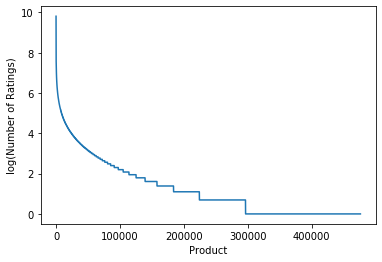

In [206]:
plt.plot(np.log(data["productId"].value_counts().values))
plt.xlabel("Product")
plt.ylabel("log(Number of Ratings)")
plt.show()

### On the similar lines, let's see the distribution of user ratings.

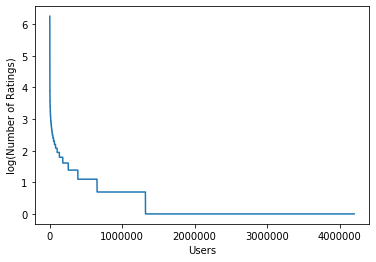

In [207]:
userRatings = data["userId"].value_counts()

plt.plot(np.log(userRatings.values))
plt.xlabel("Users")
plt.ylabel("log(Number of Ratings)")
plt.show()

### Even skweness is seen in distribution of user ratings. So now we take the subset of the data to make it denser/sparser. We will take the users only who has given 50 or more number of ratings.

In [208]:
# Number of users with atleast 50 ratings

len(userRatings[userRatings>=50].index)

1540

### We can see that only 1540 unique users who have given at least 50 ratings. So we modify the dataframe such that only these 1540 users are taken into consideration. 

In [209]:
usersMoreThan50Ratings = userRatings[userRatings >= 50].index.values

In [210]:
# Filter dataframe to keep only these users
data = data[data["userId"].isin(usersMoreThan50Ratings)]

In [211]:
data.shape

(125871, 3)

### We have substantially reduced the number of rows from 7824482 to 125871. Now that we have handled user ratings, we will also further consider products in reducing the data by only considering the products which have minimum 10 ratings.

In [212]:
productRatings = data["productId"].value_counts()

len(productRatings)

48190

In [213]:
len(productRatings[productRatings >= 10].index)

2263

### We see that there are 2263 products with atleast 10 user ratings.

In [214]:
productsMoreThan10Ratings = productRatings[productRatings >= 10].index.values

In [215]:
data = data[data["productId"].isin(productsMoreThan10Ratings)]

In [216]:
data.shape

(42941, 3)

<h3><b><font color="blue"><u>Notable Inferences : </u></font>

    

We infer that, we have further reduced rows from 125871 to 42941. In the above operations we have only considered users with more than 50 ratings and products with atleast 10 ratings. By doing this reduction in the dataset to make sparser/denser, we have increased the relevance of it for further recommendations.

So now we can proceed with the dataset.

</b></h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.6 Splitting the data into training and test datasets in the ratio of 70:30 respectively :

In [217]:
train, test = tts_sklearn(data,test_size=0.3,random_state=42)

In [218]:
train.shape

(30058, 3)

In [219]:
test.shape

(12883, 3)

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.7 Building Popularity Based Recommendation Model :

<h3><b>

We will start by creating a simple popularity based recommendation model which will give top-K recommendations.

Since we know that there are products which have been given a rating by multiple users, let's sort by mean ratings.

</b></h3>

In [220]:
train.groupby("productId")["Rating"].mean().sort_values(ascending=False).head()

productId
B00L3YHF6O    5.0
B001SER47O    5.0
B003B48UQ8    5.0
B0052SCU8U    5.0
B00007IFED    5.0
Name: Rating, dtype: float64

In [221]:
# Let's write a generic function which will output top-K recommendations

def topK_popularity(K=5):
    topK = train.groupby("productId")["Rating"].mean().sort_values(ascending=False).head(K)
    print("**************** Top {} Recommendations ****************".format(K))
    print()
    for i in range(K):
        product = topK.index[i]
        prodRating = topK.iloc[i]
        print("{}.\tProduct: {}\tMean Rating: {}".format(i+1,product,prodRating))
    print()
    print("********************************************************")
    return topK

In [222]:
# Top-5 recommendations
top5_popularity = topK_popularity(5)

**************** Top 5 Recommendations ****************

1.	Product: B00L3YHF6O	Mean Rating: 5.0
2.	Product: B001SER47O	Mean Rating: 5.0
3.	Product: B003B48UQ8	Mean Rating: 5.0
4.	Product: B0052SCU8U	Mean Rating: 5.0
5.	Product: B00007IFED	Mean Rating: 5.0

********************************************************


<h3>Analysis by Surprise : </h3>
    

In [223]:
# Reader which will be used for loading Dataset from dataframe
# The rating scale will be from 1 to 5

reader = Reader(rating_scale=(1,5))

# Surprise dataset
df_sur = Dataset.load_from_df(data[['userId','productId','Rating']],reader)

In [224]:
#Let's split the data in train and test data for surprise package

train_sur, test_sur = tts_surprise(df_sur, test_size=0.30, random_state=42)

<h3> Analysis using KNN Classifier : </h3>

<h3> We will use KNN classifier to find similar products. We will generate both user-user and item-item collaborative filtering models.

</h3>

In [225]:
# Item-item based collaborative filtering model
item_item = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': False})

In [226]:
# Fit model
item_item.fit(train_sur)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


<h3> Similarly, let's create a user-user based collaborative filtering model : </h3>

In [227]:
# Item-item based collaborative filtering model
user_user = KNNWithMeans(k=50, sim_options={'name': 'pearson_baseline', 'user_based': True})

In [228]:
# Fit model
user_user.fit(train_sur)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


<h3> Now we have created 2 collaborative filtering models and a popularity based model. So, let's evaluate the models. </h3>

In [229]:
from surprise import SVD, accuracy
algo = SVD()
algo.fit(train_sur)

predictions = algo.test(test_sur)

In [230]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 0.8891


0.8891038210053384

In [231]:
results=pd.DataFrame({'SVD':[0.89]}, index=['RMSE'])
results

,SVD
RMSE,0.89


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.8 Evaluating the Models : Analysis by RMSE 

In [232]:
# Find predictions for item-item collaborative model
test_item_item = item_item.test(test_sur)

# Find predictions for user-user collaborative model
test_user_user = user_user.test(test_sur)

In [233]:
# Find RMSE for both models
print("User-user Collaborative Filtering Model : Test Set")
accuracy.rmse(test_item_item, verbose=True)

print("--------------------------------------------------")
print("Item-item Collaborative Filtering Model : Test Set")
accuracy.rmse(test_user_user, verbose=True);


User-user Collaborative Filtering Model : Test Set
RMSE: 0.9961
--------------------------------------------------
Item-item Collaborative Filtering Model : Test Set
RMSE: 0.9929


<h3> Now let's find the RMSE for the popularity based model. </h3>

In [234]:
sorted_pop = train.groupby("productId")["Rating"].mean().sort_values(ascending=False)

### Now we will create a new column with the expected ratings of the product.

In [235]:
def expectedRating(productId):
    # If the product is in the
    # sorted popularity based products
    # dataframe, then return the
    # corresponding rating
    # Otherwise, return 0
    try:
        return sorted_pop[productId]
    except:
        return 0

In [236]:
# Add a new column with expected rating
test["Expected"] = test["productId"].apply(expectedRating)

In [237]:
test.head()

,userId,productId,Rating,Expected
2201866,A22CW0ZHY3NJH8,B001OQC0H0,4,4.111111
3718471,A2BYV7S1QP2YIG,B003ZUIHY8,5,4.461538
6243857,A20L63B48RPSOH,B008I21EA2,5,4.062500
6978022,ABQWMANK4AR63,B00AXVXXNC,4,4.500000
7571971,A2W9I628I6SE1U,B00EVWXAEQ,4,4.285714


In [238]:
# Calculate RMSE of ratings
test["error"] = (test["Rating"] - test["Expected"])**2

In [239]:
test.head()

,userId,productId,Rating,Expected,error
2201866,A22CW0ZHY3NJH8,B001OQC0H0,4,4.111111,0.012346
3718471,A2BYV7S1QP2YIG,B003ZUIHY8,5,4.461538,0.289941
6243857,A20L63B48RPSOH,B008I21EA2,5,4.062500,0.878906
6978022,ABQWMANK4AR63,B00AXVXXNC,4,4.500000,0.250000
7571971,A2W9I628I6SE1U,B00EVWXAEQ,4,4.285714,0.081633


In [240]:
print("Total RMSE: {:.4f}".format(np.sqrt(test["error"].sum()/len(test.index))))

Total RMSE: 0.9207


In [241]:
# Now let's drop the Expected and error columns
test.drop(["Expected","error"],axis=1,inplace=True)

### For the popularity based model, we already have a function for top-5 recommendations and these recommendations can be used for new users. 

In [242]:
topK_popularity(K=5);

**************** Top 5 Recommendations ****************

1.	Product: B00L3YHF6O	Mean Rating: 5.0
2.	Product: B001SER47O	Mean Rating: 5.0
3.	Product: B003B48UQ8	Mean Rating: 5.0
4.	Product: B0052SCU8U	Mean Rating: 5.0
5.	Product: B00007IFED	Mean Rating: 5.0

********************************************************


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.10 Conclusion : <br>


<h3>
We cannot use collaborative filtering model for finding top-5 recommendations for new users due to the absence of past data. In such cases, we can think of a hybrid approach, in which case we can use top-K recommendations from popularity based model for cold-start problem and use the collaborative filtering model for the users with past data about products rated.<br />
    
Collaborative based filtering method requires a minimal knowledge or engineering efforts when compared to methods such as content-based systems. This method is based on user history, but we have issue if the user is new (when there is no user history). It's one of the limitations of the method known as cold-start problem.


Collaborative filtering model was able to provide much better accuracy than popularity based model, as expected.

Collaborative-based recommendations are personalized since the rating "prediction" differs depending on the target user and it is based on :

User-to-user: ratings for a given product expressed by users that are similar to the active user.
Item-to-item: weighted average of the ratings of the active users for the similar items.

Collaborative filtering model suffers from cold-start problem because of absence of past data. In such cases, popularity based model can be used to give recommendations.

Even though the model covers a huge number of products, we have dropped significant amount of users and products in initial steps. These products have the potential of being better for a new user than the current recommendations.


Items with lots of history gets recommended a lot, while those without never make it into the recommendation engine.


User-user based collaborative filtering model has a slightly better accuracy than item-item based collaborative filtering model. Despite this, companies mostly are using item-item based collaborative filtering model. The reason behind this might be that user based nearest neighbor collaborative filtering model do not scale well for most real-world scenarios.

</h3>